In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

<b><font size="7" color="red">ch12. 데이터시각화</font></b>

In [2]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
# 그래프 저장시 해상도 높게
%config InlineBackend.figure_format = 'retina'
# 한글설정(windows mac)
plt.rc('font', family='Malgun Gothic') # 윈도우즈
# plt.rc('font', family='AppleGothic') # mac
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
# warning 안보이게
import warnings
warnings.filterwarnings(action='ignore') # warning 안 보이게

# 2절 seaborn
- matplotlib을 기반으로 만든 고수준 그래픽 라이브러리
    - 공식 사이트 : https://seaborn.pydata.org/
    - 그래프 API : https://seaborn.pydata.org/api.html
- Seaborn으로 그래프 그리기 위한 단계
    1) 데이터 준비<br>
    2) 미적속성 설정<br>
    3) 함수를 이용해서 그래프 그리기(관계형=수치형, 범주형, 쌍관계, 밀도, 회귀, 다중그래프)<br>
    4) 그래프 출력(show), 저장(savefig)

## 2.1 데이터 준비하기
- iris, titanic

In [3]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [4]:
iris.info() # dtype, 전체행수, 결측치를제외한데이터수, 메모리사용량

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
titanic = sns.load_dataset('titanic')
titanic.head()
# pclass : 티켓class
# sibsp: 통승한 형제나 배우자 / parch:동승한부모/자식수/embarked:탑승지
# deck : 데크

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 2.2 미적 속성 설정하기(style, context, palette, figsize,...)
### 1) 그래프 스타일 지정
- white, whitegrid, darkgrid, dark, ticks
### 2) 컨텍스트 지정(배율)
- notebook(기본값 1.0), paper(0.8), talk(1.3), poster(1.8)
### 3) 컬러팔레트
- https://matplotlib.org/stable/tutorials/colors/colormaps.html (colormap) 21, 54page
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://seaborn.pydata.org/tutorial/color_palettes.html

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용

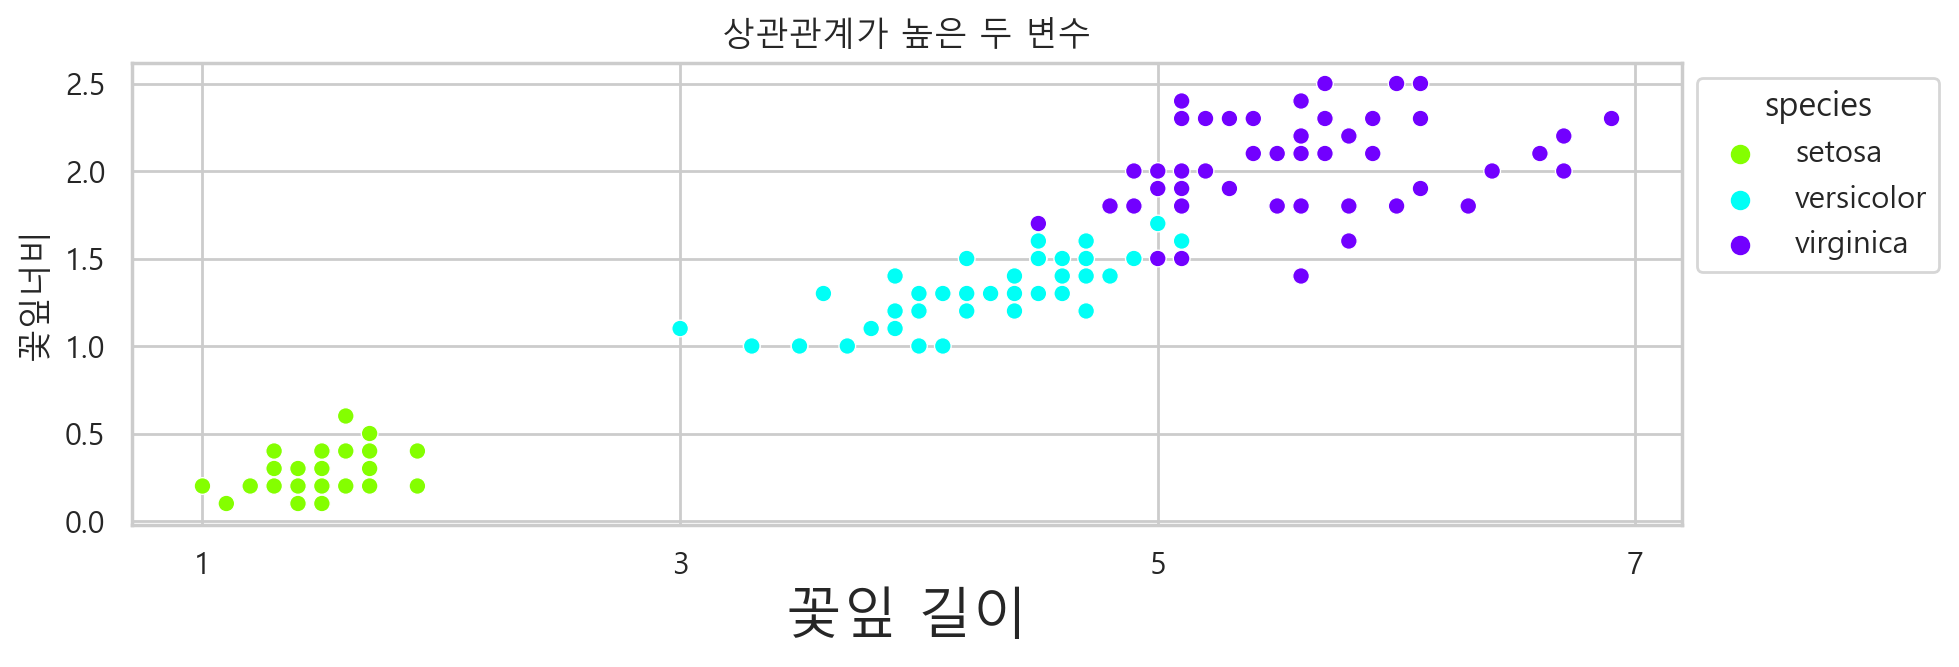

In [23]:
# 기본 미적 속성 설정
sns.set(style='whitegrid', 
        context='notebook',
        palette='Set2',
        rc={'figure.figsize':(10,3)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species',
               palette='hsv')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(title='상관관계가 높은 두 변수',
      ylabel='꽃잎너비')
ax.set_xlabel('꽃잎 길이', fontsize=20)
ax.set_xticks([1, 3, 5, 7])
plt.show()

In [24]:
# 기본 미적 속성 설정
sns.set(style='whitegrid', 
        context='notebook',
        palette='Set2',
        rc={'figure.figsize':(10,3)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지